In [1]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/datalab/google-api.json"

In [2]:
!pip install google-cloud

    100% |████████████████████████████████| 92kB 2.6MB/s ta 0:00:011
    100% |████████████████████████████████| 419kB 1.3MB/s ta 0:00:01
  Running setup.py bdist_wheel for psutil ... - \ | / - \ | done
  Stored in directory: /content/.cache/pip/wheels/9e/9d/6d/234974c01e6aa3ab6215738bfe74c30704ce28219fee8c40bb
Successfully built psutil
  Found existing installation: requests 2.9.1
    Uninstalling requests-2.9.1:
      Successfully uninstalled requests-2.9.1
  Found existing installation: psutil 4.3.0
    Uninstalling psutil-4.3.0:
      Successfully uninstalled psutil-4.3.0
You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
%bash
gsutil cp gs://kish-bucket/11.jpg /content/datalab/

Copying gs://kish-bucket/11.jpg...
/ [1 files][  3.4 MiB/  3.4 MiB]                                                
Operation completed over 1 objects/3.4 MiB.                                      


In [4]:
from google.cloud import vision
client = vision.ImageAnnotatorClient()

In [5]:
type(client)

google.cloud.vision_v1.ImageAnnotatorClient

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


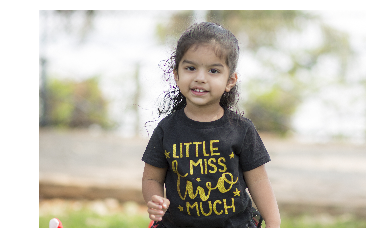

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
img=mpimg.imread('/content/datalab/11.jpg')
plt.axis('off')
plt.imshow(img)

In [7]:
response = client.face_detection({'source' : {'image_uri': "gs://kish-bucket/11.jpg"},})

In [8]:
response

face_annotations {
  bounding_poly {
    vertices {
      x: 1432
      y: 281
    }
    vertices {
      x: 2178
      y: 281
    }
    vertices {
      x: 2178
      y: 1149
    }
    vertices {
      x: 1432
      y: 1149
    }
  }
  fd_bounding_poly {
    vertices {
      x: 1495
      y: 461
    }
    vertices {
      x: 2100
      y: 461
    }
    vertices {
      x: 2100
      y: 1066
    }
    vertices {
      x: 1495
      y: 1066
    }
  }
  landmarks {
    type: LEFT_EYE
    position {
      x: 1679.764892578125
      y: 649.1085815429688
      z: 0.000964083825238049
    }
  }
  landmarks {
    type: RIGHT_EYE
    position {
      x: 1924.0721435546875
      y: 676.5947265625
      z: -14.23891830444336
    }
  }
  landmarks {
    type: LEFT_OF_LEFT_EYEBROW
    position {
      x: 1625.4617919921875
      y: 590.5908203125
      z: 28.326948165893555
    }
  }
  landmarks {
    type: RIGHT_OF_LEFT_EYEBROW
    position {
      x: 1750.60107421875
      y: 602.293701171875
  

In [21]:
response.face_annotations[0].bounding_poly.vertices

[x: 1427
y: 279
, x: 2176
y: 279
, x: 2176
y: 1149
, x: 1427
y: 1149
]

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


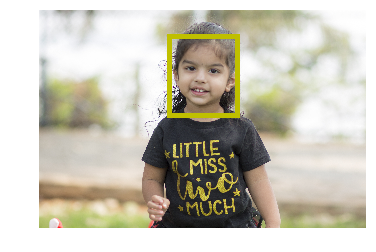

In [9]:
import matplotlib.patches as patches
import numpy as np
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(img)

# Create a Rectangle patch
x_width = np.abs(response.face_annotations[0].bounding_poly.vertices[1].x-response.face_annotations[0].bounding_poly.vertices[0].x)
y_height = np.abs(response.face_annotations[0].bounding_poly.vertices[1].y-response.face_annotations[0].bounding_poly.vertices[3].y)

rect = patches.Rectangle((response.face_annotations[0].bounding_poly.vertices[0].x,response.face_annotations[0].bounding_poly.vertices[0].y),
                         x_width,y_height,linewidth=5,edgecolor='y',facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)
plt.axis('off')
plt.show()

In [10]:
response = client.landmark_detection({'source' : {'image_uri': "https://upload.wikimedia.org/wikipedia/commons/thumb/1/1d/Taj_Mahal_%28Edited%29.jpeg/250px-Taj_Mahal_%28Edited%29.jpeg"},})

In [11]:
response

landmark_annotations {
  mid: "/m/0l8cb"
  description: "Taj Mahal"
  score: 0.940950870513916
  bounding_poly {
    vertices {
      x: 6
      y: 9
    }
    vertices {
      x: 227
      y: 9
    }
    vertices {
      x: 227
      y: 155
    }
    vertices {
      x: 6
      y: 155
    }
  }
  locations {
    lat_lng {
      latitude: 27.174698469698683
      longitude: 78.042073
    }
  }
}

In [12]:
response = client.logo_detection({'source' : {'image_uri': "https://upload.wikimedia.org/wikipedia/commons/thumb/b/b3/Wikipedia-logo-v2-en.svg/135px-Wikipedia-logo-v2-en.svg.png"},})

In [13]:
response

logo_annotations {
  mid: "/m/0d07ph"
  description: "Wikipedia"
  score: 0.5256200432777405
  bounding_poly {
    vertices {
      x: 31
      y: 28
    }
    vertices {
      x: 113
      y: 28
    }
    vertices {
      x: 113
      y: 124
    }
    vertices {
      x: 31
      y: 124
    }
  }
}

In [13]:
response_label = client.label_detection({'source' : {'image_uri': "gs://kish-bucket/11.jpg"},})

In [14]:
response_label

label_annotations {
  mid: "/m/09g5pq"
  description: "people"
  score: 0.9678633809089661
  topicality: 0.9678633809089661
}
label_annotations {
  mid: "/m/0ytgt"
  description: "child"
  score: 0.954465389251709
  topicality: 0.954465389251709
}
label_annotations {
  mid: "/m/01k74n"
  description: "facial expression"
  score: 0.9380199909210205
  topicality: 0.9380199909210205
}
label_annotations {
  mid: "/m/06z04"
  description: "skin"
  score: 0.9294329285621643
  topicality: 0.9294329285621643
}
label_annotations {
  mid: "/m/01bl7v"
  description: "boy"
  score: 0.8500118255615234
  topicality: 0.8500118255615234
}
label_annotations {
  mid: "/m/019nj4"
  description: "smile"
  score: 0.8260056972503662
  topicality: 0.8260056972503662
}
label_annotations {
  mid: "/m/05wkw"
  description: "photography"
  score: 0.8175534009933472
  topicality: 0.8175534009933472
}
label_annotations {
  mid: "/m/05r655"
  description: "girl"
  score: 0.7993512749671936
  topicality: 0.799351274

In [16]:
response_text = client.text_detection({'source' : {'image_uri': "gs://kish-bucket/11.jpg"},})

In [17]:
response_text

text_annotations {
  locale: "en"
  description: "LITTLE\nMISS\nMUCH\n"
  bounding_poly {
    vertices {
      x: 1374
      y: 1425
    }
    vertices {
      x: 2151
      y: 1425
    }
    vertices {
      x: 2151
      y: 2303
    }
    vertices {
      x: 1374
      y: 2303
    }
  }
}
text_annotations {
  description: "LITTLE"
  bounding_poly {
    vertices {
      x: 1374
      y: 1478
    }
    vertices {
      x: 1986
      y: 1424
    }
    vertices {
      x: 2001
      y: 1597
    }
    vertices {
      x: 1389
      y: 1650
    }
  }
}
text_annotations {
  description: "MISS"
  bounding_poly {
    vertices {
      x: 1652
      y: 1650
    }
    vertices {
      x: 2056
      y: 1617
    }
    vertices {
      x: 2069
      y: 1784
    }
    vertices {
      x: 1665
      y: 1816
    }
  }
}
text_annotations {
  description: "MUCH"
  bounding_poly {
    vertices {
      x: 1571
      y: 2112
    }
    vertices {
      x: 2134
      y: 2063
    }
    vertices {
      x: 215

In [37]:
response_label.label_annotations[0].description

'people'

In [41]:
len(response_label.label_annotations)

10